ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HappinessSurvey2020.csv')

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
df.info() # Totaly seven columns, 126 values, all values integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


<AxesSubplot:>

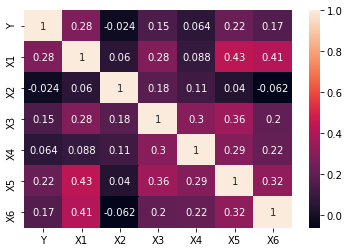

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
df.rename(columns={'Y':'target','X1':'delivered_on_time', 'X2':'expect_order_content', 'X3':'order_of_everything', 'X4':'price_level', 'X5':'courier_satisfaction', 'X6':'app_satisfaction'}, inplace=True)

In [7]:
df.info() # Changed columns names to read dataset easily

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   target                126 non-null    int64
 1   delivered_on_time     126 non-null    int64
 2   expect_order_content  126 non-null    int64
 3   order_of_everything   126 non-null    int64
 4   price_level           126 non-null    int64
 5   courier_satisfaction  126 non-null    int64
 6   app_satisfaction      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


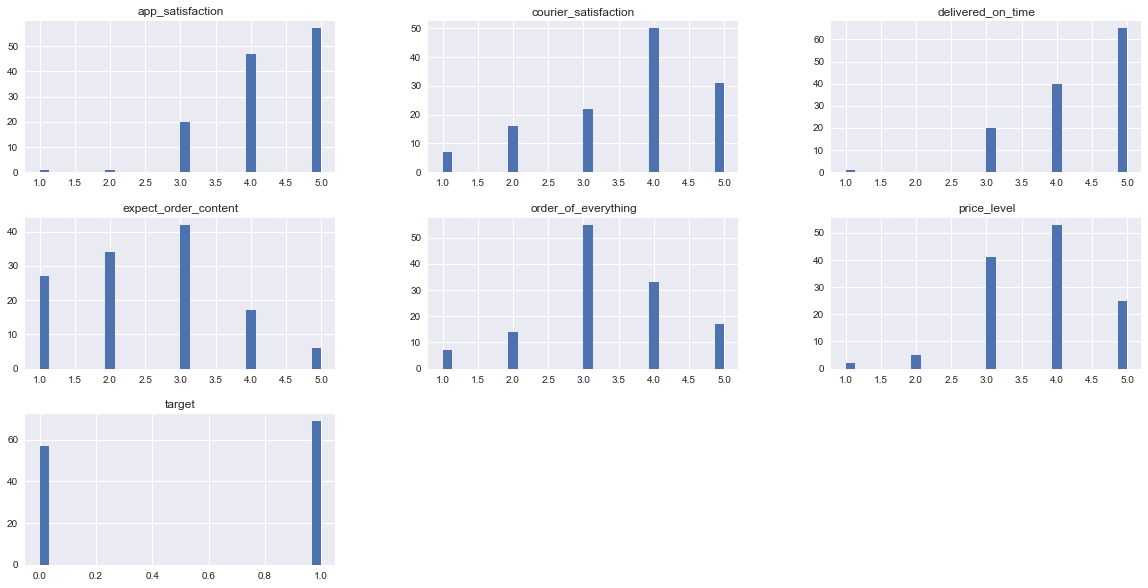

In [8]:
plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,10))
plt.show()

<AxesSubplot:>

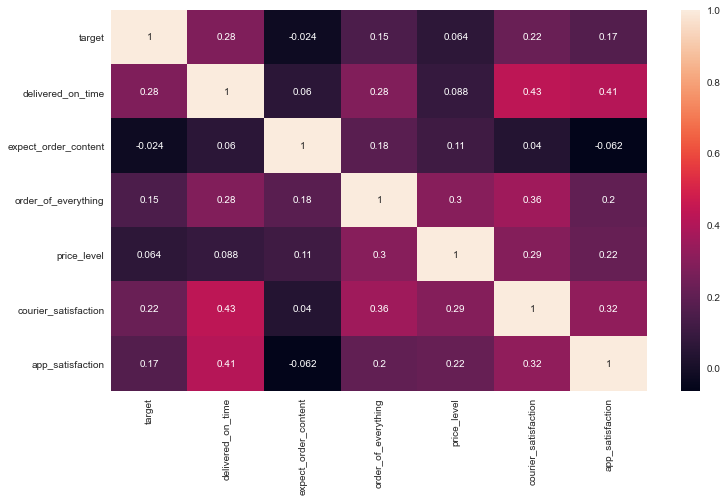

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)  # Some feature correlated, some not

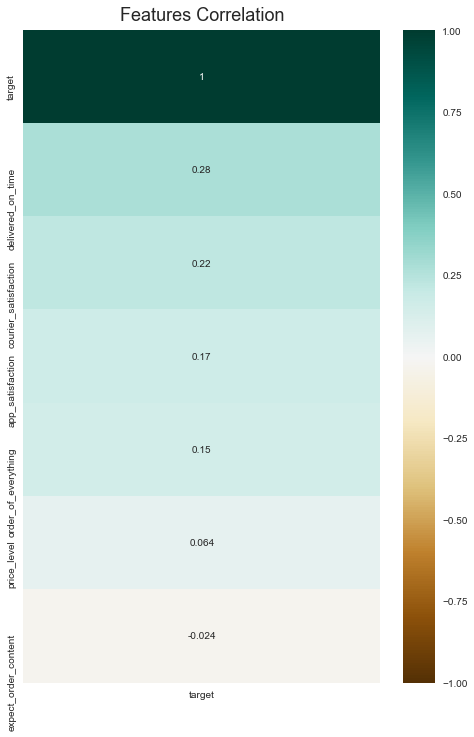

In [10]:
plt.figure(figsize=(8, 12))
heatmap2 = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2.set_title('Features Correlation', fontdict={'fontsize':18}, pad=10);

In [11]:
df.isnull().sum() # no null

target                  0
delivered_on_time       0
expect_order_content    0
order_of_everything     0
price_level             0
courier_satisfaction    0
app_satisfaction        0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='Density'>

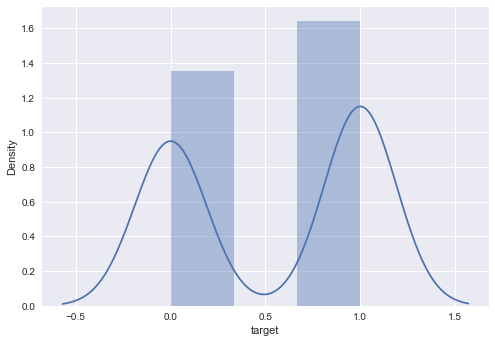

In [12]:
sns.distplot(df.target) # target column only consists of 0's and 1's

<AxesSubplot:xlabel='target', ylabel='count'>

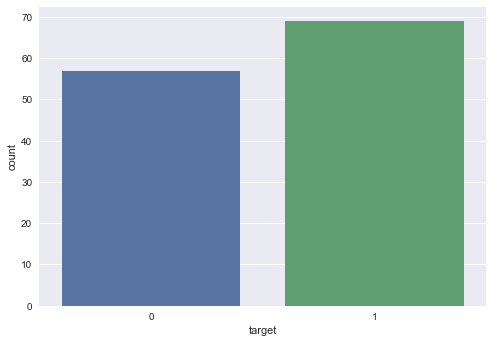

In [13]:
sns.countplot(df.target) # data is balanced

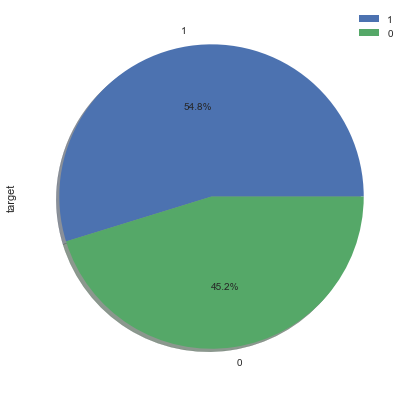

In [14]:
bin_percent = pd.DataFrame(df['target'].value_counts(normalize=True) * 100)
plot = bin_percent.plot.pie(y='target', figsize=(7, 7), autopct='%1.1f%%',shadow=True)

In [15]:
df.head()

,target,delivered_on_time,expect_order_content,order_of_everything,price_level,courier_satisfaction,app_satisfaction
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


<AxesSubplot:xlabel='delivered_on_time', ylabel='count'>

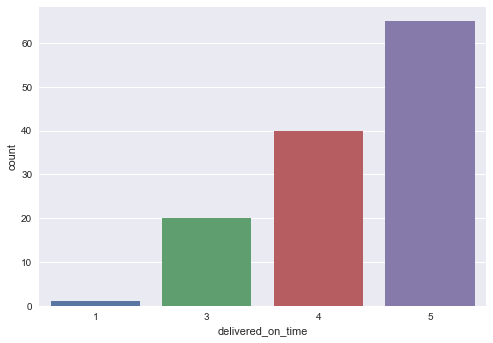

In [16]:
sns.countplot(df.delivered_on_time) # in generaly all product delivered on time. but I can say to 1 product outlier

<AxesSubplot:xlabel='delivered_on_time'>

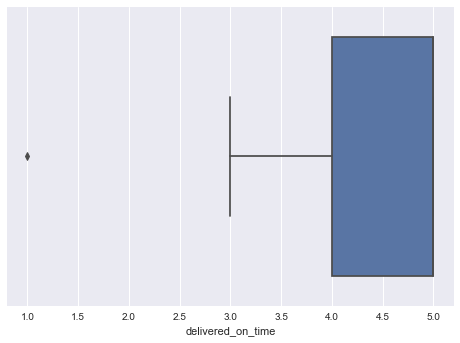

In [17]:
sns.boxplot(df['delivered_on_time']) # We saw 1 outlier value

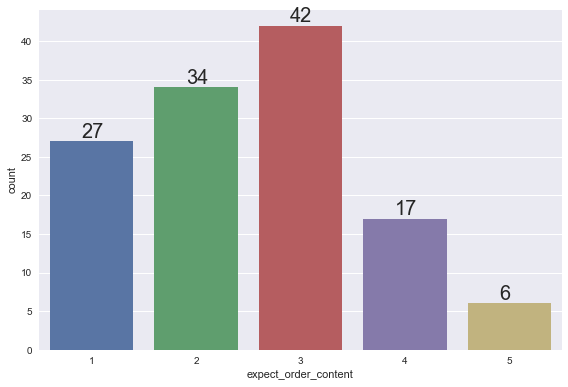

In [18]:
g = sns.countplot(df['expect_order_content'],data=df)
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.30, p.get_height()+0.5), size = 20)
plt.tight_layout()

<AxesSubplot:xlabel='expect_order_content'>

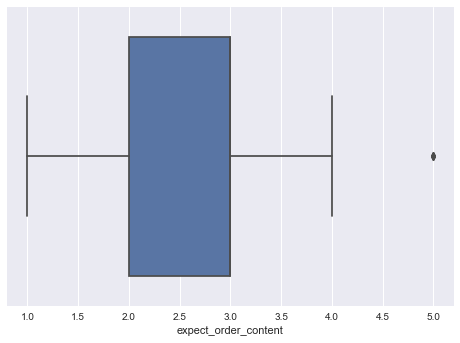

In [19]:
sns.boxplot(df['expect_order_content']) # # Should be  interested in X2(order content expected)

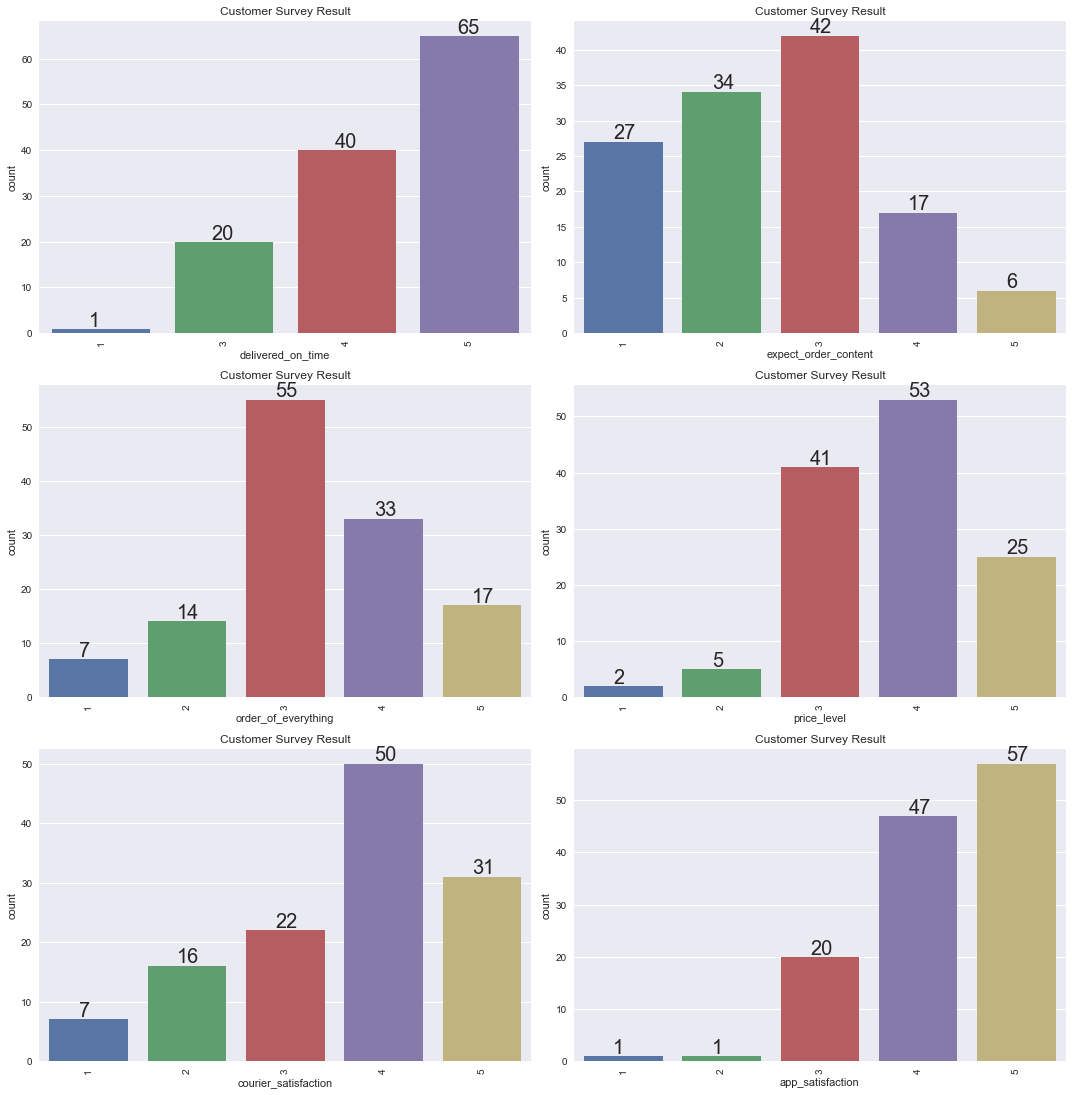

In [20]:
features=['delivered_on_time', 'expect_order_content',
       'order_of_everything', 'price_level', 'courier_satisfaction',
       'app_satisfaction']
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.2)
    g=sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("Customer Survey Result")
    for p in g.patches:
        g.annotate((p.get_height()), (p.get_x()+ 0.30, p.get_height()+0.5), size = 20)
plt.tight_layout()

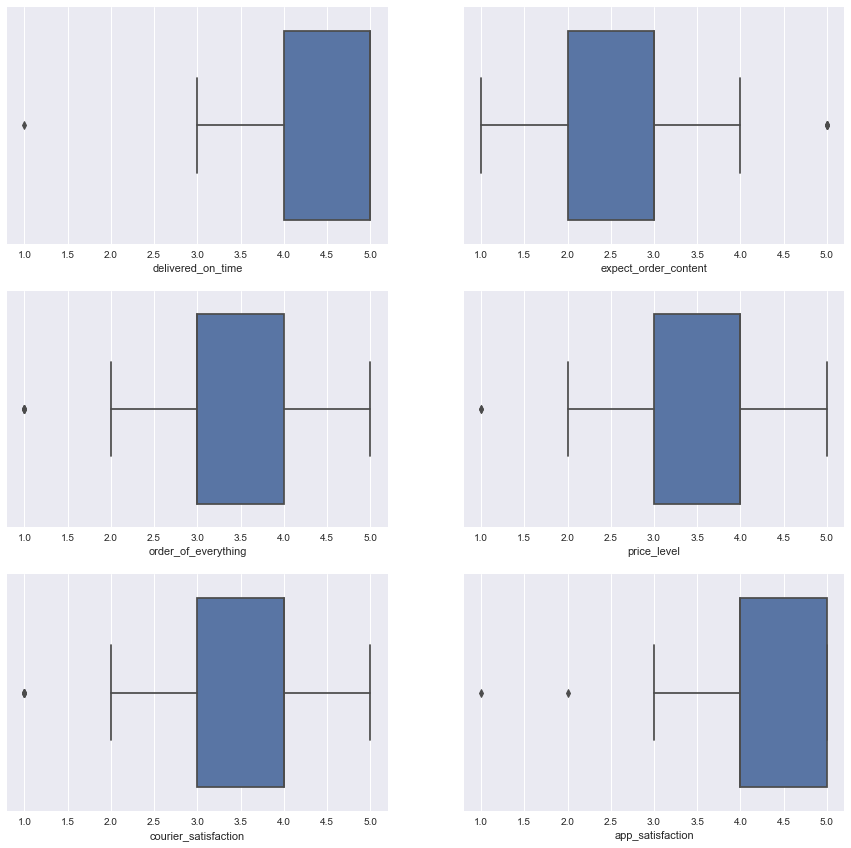

In [21]:
features=['delivered_on_time', 'expect_order_content',
       'order_of_everything', 'price_level', 'courier_satisfaction',
       'app_satisfaction']
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.2)
    g=sns.boxplot(x=j,data = df)

## Model Training

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model = LogisticRegression()

In [26]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = log_model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 5, 12],
       [ 6,  9]], dtype=int64)

Text(0.5, 29.5, 'Predicted Label')

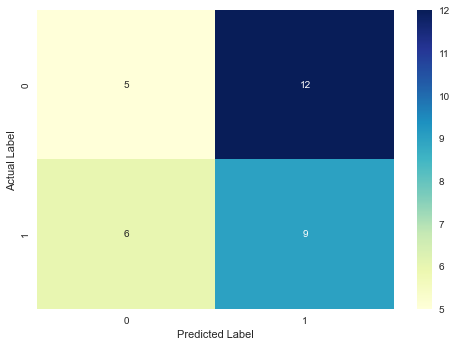

In [30]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.29      0.36        17
           1       0.43      0.60      0.50        15

    accuracy                           0.44        32
   macro avg       0.44      0.45      0.43        32
weighted avg       0.44      0.44      0.42        32



### Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gbc = GradientBoostingClassifier()

In [34]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [35]:
y_pred = gbc.predict(X_test)

In [36]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[8, 9],
       [6, 9]], dtype=int64)

Text(0.5, 29.5, 'Predicted Label')

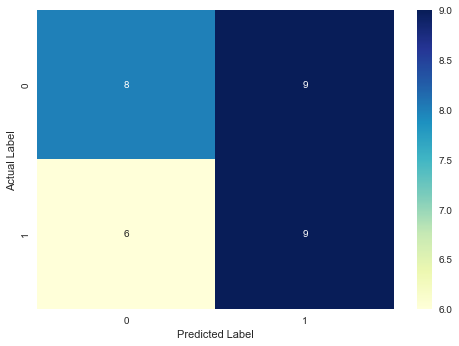

In [37]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.47      0.52        17
           1       0.50      0.60      0.55        15

    accuracy                           0.53        32
   macro avg       0.54      0.54      0.53        32
weighted avg       0.54      0.53      0.53        32



### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [41]:
y_pred = rf_model.predict(X_test)

In [42]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 6, 11],
       [ 3, 12]], dtype=int64)

Text(0.5, 29.5, 'Predicted Label')

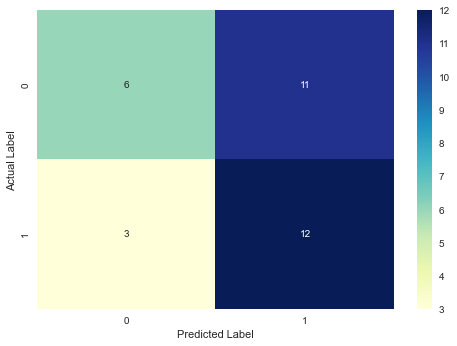

In [43]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.35      0.46        17
           1       0.52      0.80      0.63        15

    accuracy                           0.56        32
   macro avg       0.59      0.58      0.55        32
weighted avg       0.60      0.56      0.54        32



### XGBoost

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_pred = xgb_classifier.predict(X_test)

In [48]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 8,  9],
       [ 2, 13]], dtype=int64)

Text(0.5, 29.5, 'Predicted Label')

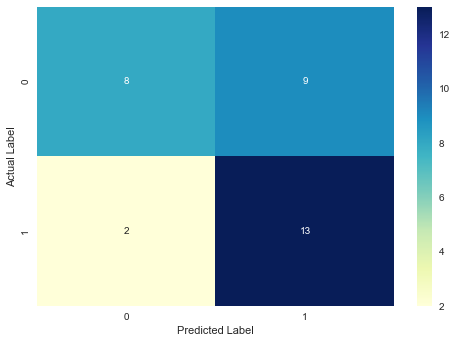

In [49]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        17
           1       0.59      0.87      0.70        15

    accuracy                           0.66        32
   macro avg       0.70      0.67      0.65        32
weighted avg       0.70      0.66      0.64        32



### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
modelTree = DecisionTreeClassifier()

In [53]:
modelTree.fit(X_train , y_train)

DecisionTreeClassifier()

In [54]:
y_pred = modelTree.predict(X_test)

In [55]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 7, 10],
       [ 7,  8]], dtype=int64)

Text(0.5, 29.5, 'Predicted Label')

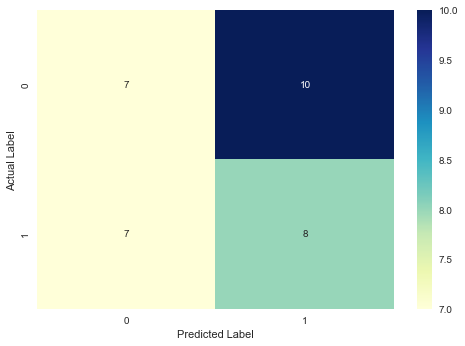

In [56]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.44      0.53      0.48        15

    accuracy                           0.47        32
   macro avg       0.47      0.47      0.47        32
weighted avg       0.47      0.47      0.47        32



### Ada Boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [60]:
ada_model = ada.fit(X_train, y_train)

In [61]:
y_pred = ada_model.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        17
           1       0.56      0.67      0.61        15

    accuracy                           0.59        32
   macro avg       0.60      0.60      0.59        32
weighted avg       0.60      0.59      0.59        32



### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
gnb = GaussianNB()

In [65]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.24      0.30        17
           1       0.41      0.60      0.49        15

    accuracy                           0.41        32
   macro avg       0.40      0.42      0.39        32
weighted avg       0.40      0.41      0.39        32



### SVM

In [67]:
from sklearn.svm import SVC

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
clf = SVC(kernel='linear',)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.24      0.32        17
           1       0.46      0.73      0.56        15

    accuracy                           0.47        32
   macro avg       0.48      0.48      0.44        32
weighted avg       0.48      0.47      0.43        32



## After Drops 'expect_order_content' & 'price_level'

In [71]:
df_new = df.drop(['expect_order_content','price_level'], axis=1) # dropped uncorelated columns

In [72]:
df_new.head()

,target,delivered_on_time,order_of_everything,courier_satisfaction,app_satisfaction
0,0,3,3,2,4
1,0,3,3,4,3
2,1,5,3,3,5
3,0,5,3,3,5
4,0,5,3,3,5


In [73]:
X = df_new.drop('target',axis=1)
y = df_new['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Logistic Regression

In [74]:
log_reg_new = LogisticRegression()
log_reg_new.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_pred = log_reg_new.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.64      0.60      0.62        15

    accuracy                           0.58        26
   macro avg       0.57      0.57      0.57        26
weighted avg       0.58      0.58      0.58        26



In [76]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [77]:
log_reg_new_f1 = f1_score(y_test, y_pred, average='macro')
log_reg_new_f1

0.5712143928035982

In [78]:
log_reg_new_accuracy = accuracy_score(y_test, y_pred)
log_reg_new_accuracy

0.5769230769230769

### XGBOOST

In [79]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_pred = xgb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.73      0.73      0.73        15

    accuracy                           0.69        26
   macro avg       0.68      0.68      0.68        26
weighted avg       0.69      0.69      0.69        26



In [81]:
xgb_classifier_f1 = f1_score(y_test, y_pred, average='macro')
xgb_classifier_f1

0.6848484848484848

In [82]:
xgb_classifier_accuracy = accuracy_score(y_test, y_pred)
xgb_classifier_accuracy

0.6923076923076923

### Random Forest

In [83]:
rf_new = RandomForestClassifier()
rf_new.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
y_pred=rf_new.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.73      0.73      0.73        15

    accuracy                           0.69        26
   macro avg       0.68      0.68      0.68        26
weighted avg       0.69      0.69      0.69        26



In [86]:
rf_new_f1 = f1_score(y_test, y_pred, average='macro')
rf_new_f1

0.6848484848484848

In [87]:
rf_new_accuracy = accuracy_score(y_test, y_pred)
rf_new_accuracy

0.6923076923076923

### Decision Tree

In [88]:
DecisionTree_new = DecisionTreeClassifier()
DecisionTree_new.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred=DecisionTree_new.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.75      0.80      0.77        15

    accuracy                           0.73        26
   macro avg       0.72      0.72      0.72        26
weighted avg       0.73      0.73      0.73        26



In [91]:
DecisionTree_new_f1 = f1_score(y_test, y_pred, average='macro')
DecisionTree_new_f1

0.7204301075268817

In [92]:
DecisionTree_new_accuracy = accuracy_score(y_test, y_pred)
DecisionTree_new_accuracy

0.7307692307692307

# F1 Score Comparison

Text(0.5, 1.0, 'Accuracy Score of Different Models')

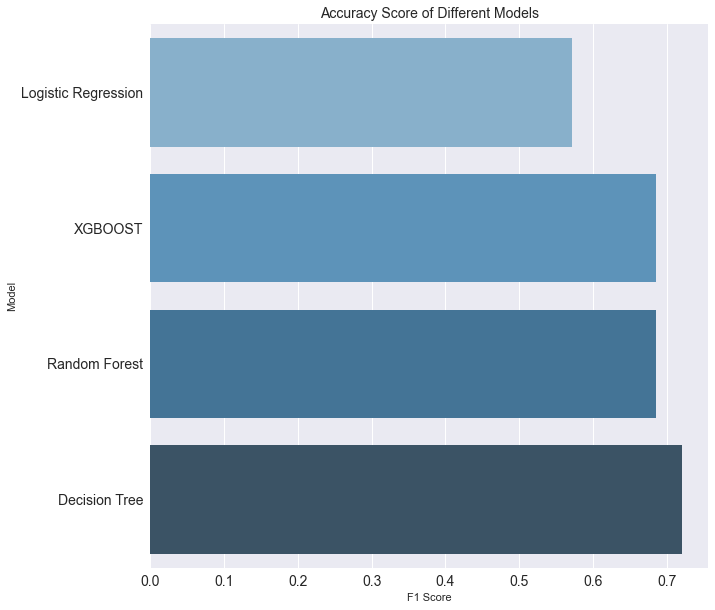

In [93]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "XGBOOST", "Random Forest", "Decision Tree"],
                        "F1 Score": [log_reg_new_f1, xgb_classifier_f1, rf_new_f1, DecisionTree_new_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

# Accuracy Comparison

Text(0.5, 1.0, 'Accuracy Score of Different Models')

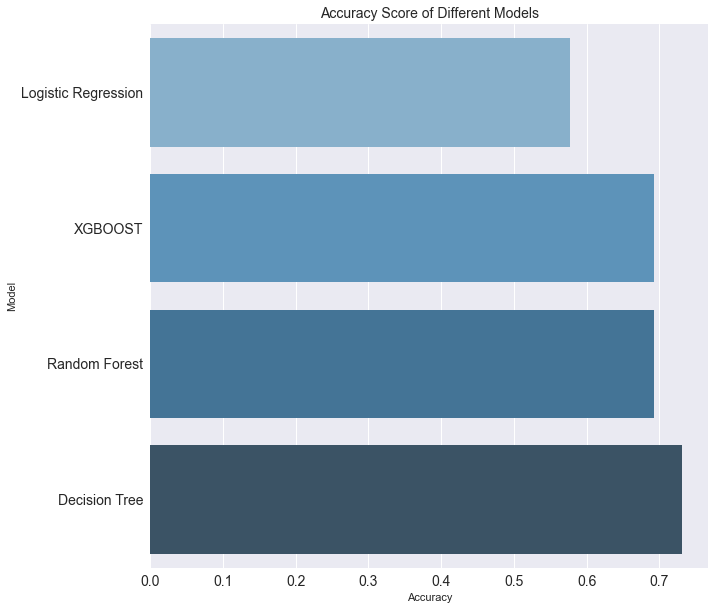

In [94]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "XGBOOST", "Random Forest", "Decision Tree"],
                        "Accuracy": [log_reg_new_accuracy,  xgb_classifier_accuracy, rf_new_accuracy, DecisionTree_new_accuracy]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

### Model Deployment

In [124]:
import pickle

In [125]:
pickle.dump(rf_new,open('DecisionTree_new_model','wb'))

In [126]:
X.columns

Index(['delivered_on_time', 'order_of_everything', 'courier_satisfaction',
       'app_satisfaction'],
      dtype='object')

In [127]:
df_new.sample(10)

,target,delivered_on_time,order_of_everything,courier_satisfaction,app_satisfaction
64,1,4,3,4,4
57,0,4,4,3,4
4,0,5,3,3,5
34,1,4,3,1,4
78,0,5,3,2,5
98,1,4,3,3,3
71,0,4,5,1,3
10,0,3,3,2,3
13,0,4,4,4,3
124,0,4,3,4,5


In [134]:
my_dict = {
    "delivered_on_time": 4,
    "order_of_everything": 3,
    "courier_satisfaction": 3,
    "app_satisfaction": 4
}

df = pd.DataFrame.from_dict([my_dict])

In [135]:
df

,delivered_on_time,order_of_everything,courier_satisfaction,app_satisfaction
0,4,3,3,4


In [136]:
prediction = rf_new.predict(df)
print(prediction)

[1]


## Conclusion

X2 and X4 features do not affect customer satisfaction much.
On the other hand Other features are important for customers.
Customers are generally satisfied with the products delivered on time,use of the application, the courier and the product's price.
Customers are not happy because the products are not what they expected.
More attention should be paid to the quality of products.
The products should be tried to delivered completely.
According to the dataset, 73 percent of customers are happy.